# Plotting

sym.expand(expression)
sym.simplify(expression)
sym.limit(function, variable, point)
sym.diff(function, variable, order)
sym.series(expression, variable)
sym.integrate(function,(variable,lowlimit,highlimit))
sym.solveset(function,variable)
sym.solve((eq1,eq2),(var1,var2))
sym.factor(function)


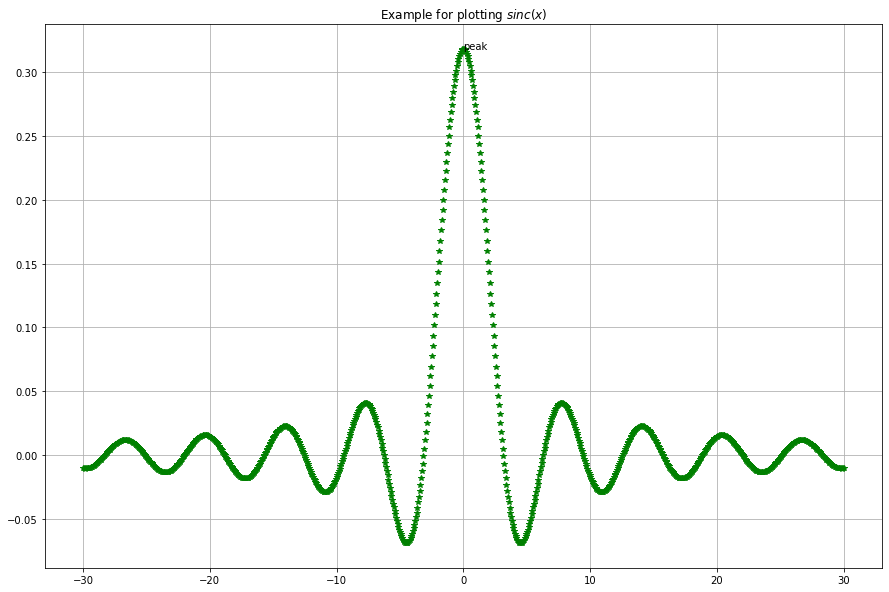

In [16]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import pprint

t=np.linspace(-30,30,1000)
y=np.sin(t)/(np.pi*t)

fig=plt.figure(figsize=(15,10))
plt.plot(t,y,'*g')
plt.grid()
plt.title("Example for plotting $sinc(x)$")
x=sym.Symbol('x')
plt.annotate("peak",xy=(0,sym.limit(sym.sin(x)/(sym.pi*x),x,0)))

print("sym.expand(expression)")
print("sym.simplify(expression)")
print("sym.limit(function, variable, point)")
print("sym.diff(function, variable, order)")
print("sym.series(expression, variable)") # Taylor series
print("sym.integrate(function,(variable,lowlimit,highlimit))")
print("sym.solveset(function,variable)")
print("sym.solve((eq1,eq2),(var1,var2))")
print("sym.factor(function)")

# Defining functions

In [27]:
print("defining functions")
def f(x):
    return sym.exp(x)**4-3*x**2+1
for i in range(1,4):
    pprint(f(i))
    print(f(i).evalf())

defining functions
      4
-2 + ℯ 
52.5981500331442
       8
-11 + ℯ 
2969.95798704173
       12
-26 + ℯ  
162728.791419004


# Solving differential equations

In [5]:
print("Solving differential equations")
x=sym.Symbol('x')
f, g = sym.symbols('f g', cls=sym.Function) #create an undefined function by passing cls=Function 
#  f(x), will represent an unknown function
pprint(f(x).diff(x)+f(x))
pprint(f(x).diff(x,x)+f(x))
print("\nsolving differential equations")
pprint(sym.dsolve(f(x).diff(x,x)+f(x),f(x)))
# pprint(sym.dsolve(sym.sin(x) * sym.cos(f(x)) + sym.cos(x) * sym.sin(f(x)) * f(x).diff(x), f(x), hint='separable')) #solve as seperable equation
pprint((f(x).diff(x)*x+f(x)-f(x)**2))
pprint(sym.dsolve(f(x).diff(x)*x+f(x)-f(x)**2,f(x)))

Solving differential equations
       d       
f(x) + ──(f(x))
       dx      
         2      
        d       
f(x) + ───(f(x))
         2      
       dx       

solving differential equations
f(x) = C₁⋅sin(x) + C₂⋅cos(x)
  d           2          
x⋅──(f(x)) - f (x) + f(x)
  dx                     
         -C₁  
f(x) = ───────
       -C₁ + x


# Generating phase portrait

Generating phase portrait

x′′+sin(x)=0
Breaking them to first order ode
x1′=x2 x2'=−sin(x1)

To generate the phase portrait, we need to compute the derivatives x1′ and x2′ at t=0 on a grid over the range of values for x1 and x2 we are interested in. We will plot the derivatives as a vector at each (x1, x2) which will show us the initial direction from each point.


Text(-0.09, -0.09, 'Origin')

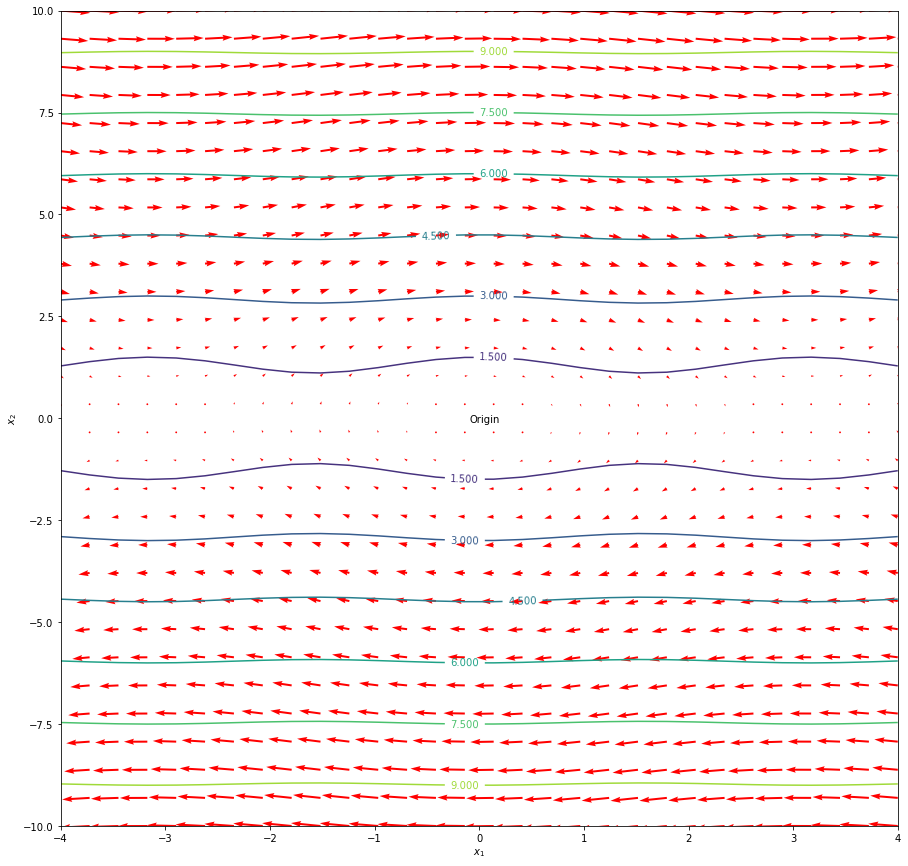

In [53]:
print("Generating phase portrait\n")
print("x′′+sin(x)=0")
print("Breaking them to first order ode")
print("x1′=x2 x2'=−sin(x1)")
print("\nTo generate the phase portrait, we need to compute the derivatives x1′ and x2′ at t=0 on a grid over the range of values for x1 and x2 we are interested in. We will plot the derivatives as a vector at each (x1, x2) which will show us the initial direction from each point.")

import numpy as np
import matplotlib.pyplot as plt

# States of the system, we input a point to get the derivates of states
def f(X,t):
    x1, x2 = X
    return [x2, -np.sin(x1)]

# To create a meshgrid for all possible state values
x1 = np.linspace(-4.0,4.0,30)
x2 = np.linspace(-10.0,10.0,30)

X1,X2=np.meshgrid(x1,x2)
# print(X1.shape)

t=0
u, v = np.zeros(X1.shape), np.zeros(X2.shape)

rows, columns = X1.shape

# using the meshgrid of states we find the derivatives at those points
for i in range(rows):
    for j in range(columns):
        x = X1[i,j]
        y = X2[i,j]
        Xprime = f([x,y],t)
        u[i,j] = Xprime[0]
        v[i,j] = Xprime[1]

z=np.sqrt(u**2+v**2)
fig=plt.figure(figsize=(15,15))
Cp = plt.contour(x1,x2,z)
plt.grid()
plt.clabel(Cp,inline=True,fontsize=10)
Q = plt.quiver(X1, X2, u, v, color='r')
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.annotate("Origin",xy=(-0.09,-0.09))
# plt.xlim([-2,8])
# plt.ylim([-4,4])


Plotting solution of a vector field
We will consider the solutions where x1(0)=0, and values of x2(0) = [0 0.5 1 1.5 2 2.5], in otherwords we start the pendulum at an angle of zero, with some angular velocity


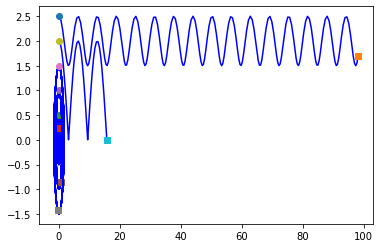

In [2]:
print("Plotting solution of a vector field")
print("We will consider the solutions where x1(0)=0, and values of x2(0) = [0 0.5 1 1.5 2 2.5], in otherwords we start the pendulum at an angle of zero, with some angular velocity")

from scipy.integrate import odeint

for x20 in [0, 0.5, 1, 1.5, 2, 2.5]:
    t=np.linspace(0,50,200)
    X0 = [0.0,x20]
    Xsol=odeint(f,X0,t)
    plt.plot(Xsol[:,0],Xsol[:,1],'b-')# path
    plt.plot([Xsol[0,0]],[Xsol[0,1]],'o')#start
    plt.plot([Xsol[-1,0]],[Xsol[-1,1]],'s') #end
    plt.annotate("Origin",xy=(-0.09,-0.09))

# plt.xlim([-2,8])
# plt.show()

(-10, 10)

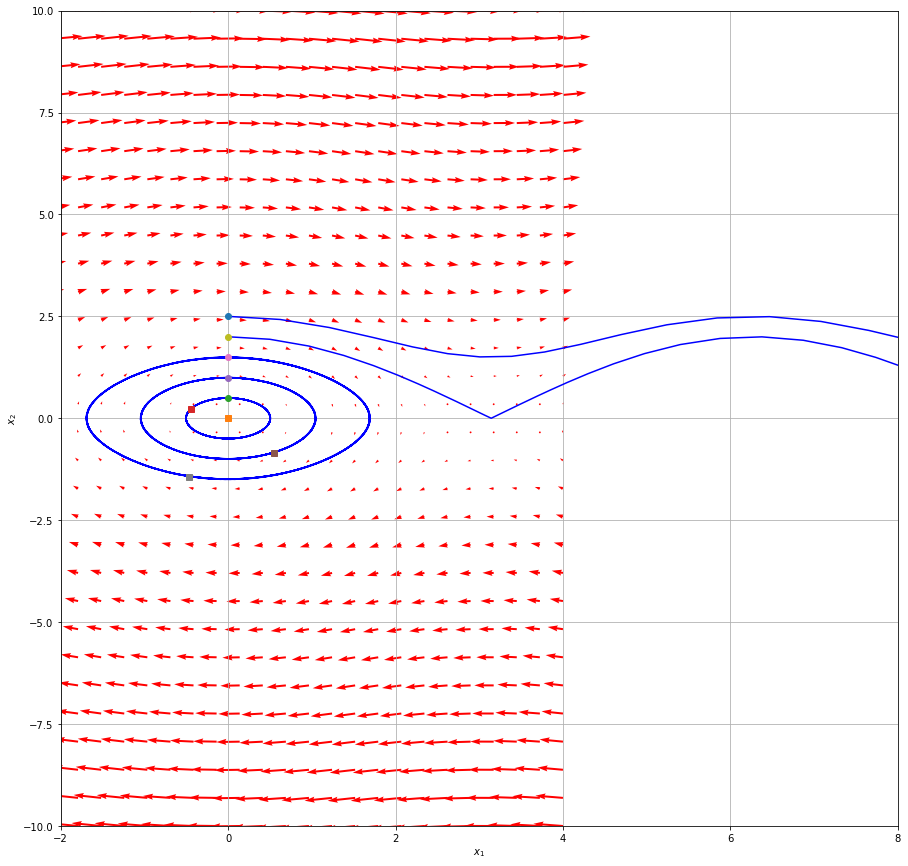

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(X,t):
    x1, x2 = X
    return [x2, -np.sin(x1)]

x1 = np.linspace(-4.0,4.0,30)
x2 = np.linspace(-10.0,10.0,30)

X1,X2=np.meshgrid(x1,x2)
t=0

u, v = np.zeros(X1.shape), np.zeros(X2.shape)

NI, NJ = X1.shape

for i in range(NI):
    for j in range(NJ):
        x = X1[i,j]
        y = X2[i,j]
        Xprime = f([x,y],t)
        u[i,j] = Xprime[0]
        v[i,j] = Xprime[1]
        
fig=plt.figure(figsize=(15,15))
Q = plt.quiver(X1, X2, u, v, color='r')
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


from scipy.integrate import odeint

for x20 in [0, 0.5, 1, 1.5, 2, 2.5]:
    t=np.linspace(0,50,200)
    X0 = [0.0,x20]
    Xsol=odeint(f,X0,t)
    plt.plot(Xsol[:,0],Xsol[:,1],'b-')# path
    plt.plot([Xsol[0,0]],[Xsol[0,1]],'o')#start
    plt.plot([Xsol[-1,0]],[Xsol[-1,1]],'s') #end

plt.annotate("Origin",xy=(-0.09,-0.09))
plt.xlim([-2,8])
plt.ylim([-10,10])
# plt.savefig('Output.png')

# Working Example for Linear system

Generating phase portrait

x′′+sin(x)=0
Breaking them to first order ode
x1′=x2 x2'=−sin(x1)

To generate the phase portrait, we need to compute the derivatives x1′ and x2′ at t=0 on a grid over the range of values for x1 and x2 we are interested in. We will plot the derivatives as a vector at each (x1, x2) which will show us the initial direction from each point.


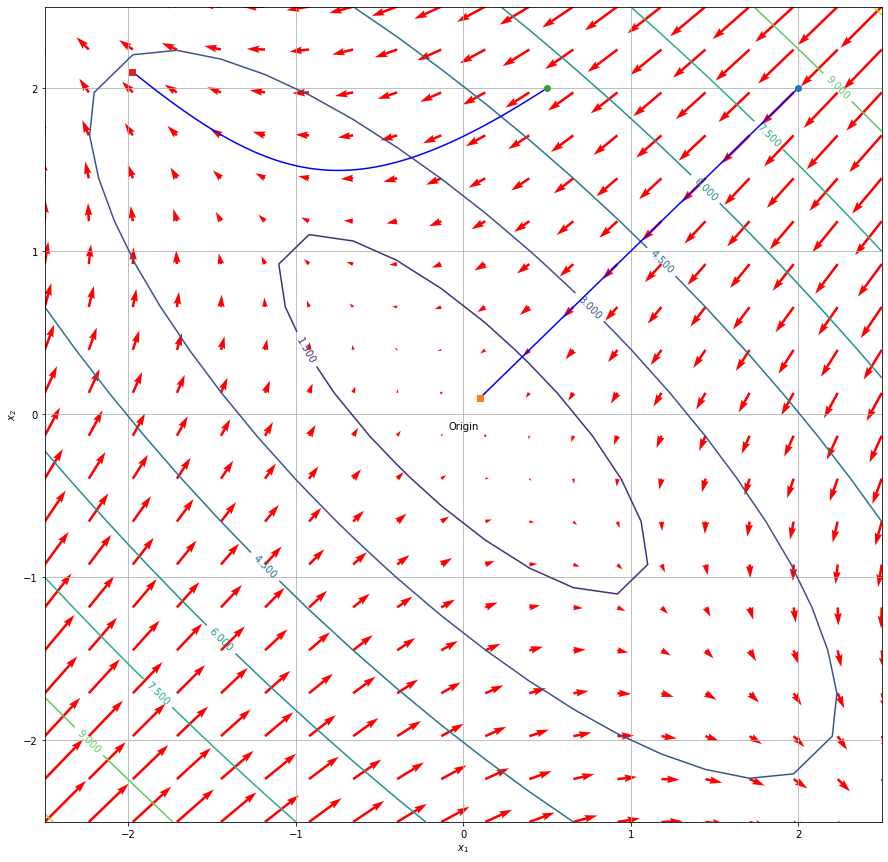

In [117]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from sympy import pprint
from scipy.integrate import odeint

print("Generating phase portrait\n")
print("x′′+sin(x)=0")
print("Breaking them to first order ode")
print("x1′=x2 x2'=−sin(x1)")
print("\nTo generate the phase portrait, we need to compute the derivatives x1′ and x2′ at t=0 on a grid over the range of values for x1 and x2 we are interested in. We will plot the derivatives as a vector at each (x1, x2) which will show us the initial direction from each point.")

import numpy as np
import matplotlib.pyplot as plt

# States of the system, we input a point to get the derivates of states
def f(X,t):
    x1, x2 = X
    return [-1*x1-2*x2, -2*x1-1*x2]

# To create a meshgrid for all possible state values
space=2.5
points=20
x1 = np.linspace(-space,space,points)
x2 = np.linspace(-space,space,points)

X1,X2=np.meshgrid(x1,x2)
# print(X1.shape)

t=0
u, v, z = np.zeros(X1.shape), np.zeros(X2.shape),np.zeros(X2.shape) 
rows, columns = X1.shape

# using the meshgrid of states we find the derivatives at those points
for i in range(rows):
    for j in range(columns):
        x = X1[i,j]
        y = X2[i,j]
        Xprime = f([x,y],t)
        u[i,j] = Xprime[0]
        v[i,j] = Xprime[1]

z=np.sqrt(u**2+v**2)
fig=plt.figure(figsize=(15,15))
Q = plt.quiver(X1, X2, u, v, color='r')
Cp = plt.contour(x1,x2,z)
plt.grid()
plt.clabel(Cp,inline=True,fontsize=10)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.annotate("Origin",xy=(-0.09,-0.09))
# plt.xlim([-2,8])
# plt.ylim([-4,4])

for end in range(1,2):
    t=np.linspace(0,end,100)
    X0=[2,2]
    Xsol=odeint(f,X0,t)
    plt.plot(Xsol[:,0],Xsol[:,1],'b-')# path
    plt.plot([Xsol[0,0]],[Xsol[0,1]],'o')#start
    plt.plot([Xsol[-1,0]],[Xsol[-1,1]],'s') #end
    X01=[0.5,2]
    Xsol1=odeint(f,X01,t)
    plt.plot(Xsol1[:,0],Xsol1[:,1],'b-')# path
    plt.plot([Xsol1[0,0]],[Xsol1[0,1]],'o')#start
    plt.plot([Xsol1[-1,0]],[Xsol1[-1,1]],'s') #end

# plt.savefig('Output.png')

# Test Bench

In [56]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from sympy import pprint
from scipy.integrate import odeint